In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv('/content/placement.csv')

In [ ]:
dataset.head()

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

Now we have to preprocess the given dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


Remove Unkonwn coloum using data preprocessing


In [8]:
dataset=dataset.iloc[:,1:]

In [10]:
dataset.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [11]:
import matplotlib.pyplot as plt


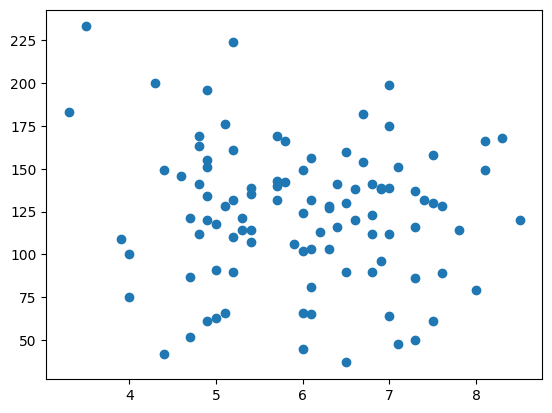

In [12]:
plt.scatter(dataset['cgpa'],dataset['iq'])

Now check whoes placed in given data in scatter view

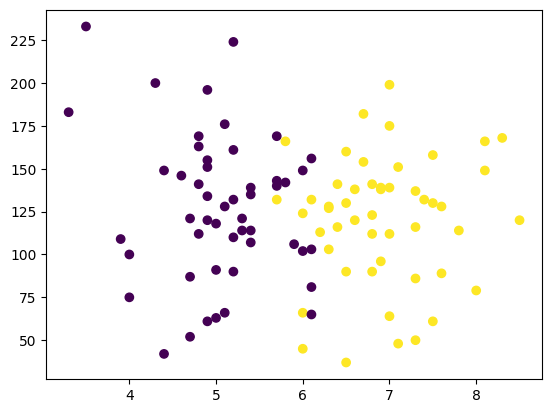

In [13]:
plt.scatter(dataset['cgpa'],dataset['iq'],c=dataset['placement']) #here c stands for colour the placement data

Here we Logestic regression Algorithm

In [14]:
x=dataset.iloc[:,0:2]
y=dataset.iloc[:,-1]

In [15]:
x

cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]

In [16]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [27]:
x_train

cgpa     iq
73   4.9   61.0
41   5.4  114.0
51   4.8  141.0
54   6.4  141.0
31   3.9  109.0
..   ...    ...
56   6.1   65.0
44   7.5   61.0
29   7.0  112.0
42   7.6   89.0
59   4.8  112.0

[90 rows x 2 columns]

In [28]:
x_test

cgpa     iq
90   7.3   86.0
16   5.2  224.0
22   4.9  120.0
57   6.5  130.0
0    6.8  123.0
84   5.7  169.0
36   5.7  140.0
97   6.7  182.0
11   6.9  138.0
15   5.1  176.0

In [29]:
y_train

73    0
41    0
51    0
54    1
31    0
     ..
56    0
44    1
29    1
42    1
59    0
Name: placement, Length: 90, dtype: int64

In [30]:
y_test

90    1
16    0
22    0
57    1
0     1
84    0
36    0
97    1
11    1
15    0
Name: placement, dtype: int64

Scaling the dataset

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.9257682 , -1.53215055],
       [-0.4976123 , -0.17371967],
       [-1.01139939,  0.51831115],
       [ 0.3586995 ,  0.51831115],
       [-1.78208001, -0.30187353],
       [ 0.87248658,  0.46704961],
       [ 1.12938012,  0.41578807],
       [-0.84013702, -0.07119659],
       [-0.9257682 ,  1.92800357],
       [ 1.2150113 ,  0.28763421],
       [ 0.3586995 , -0.12245813],
       [ 0.52996186, -0.01993504],
       [-1.35392411,  0.72335732],
       [ 1.38627366,  0.18511113],
       [ 0.7868554 , -0.63507356],
       [-0.84013702, -0.76322741],
       [ 0.01617478,  0.72335732],
       [ 0.18743714, -0.19935044],
       [ 0.44433068,  1.00529581],
       [ 0.27306832, -0.45565816],
       [ 0.27306832,  0.15948035],
       [ 0.61559304,  0.85151118],
       [ 0.87248658,  1.38975738],
       [-1.09703057,  0.00569573],
       [ 0.87248658,  2.00489589],
       [-0.75450584, -1.40399669],
       [-2.12460473,  2.87634211],
       [-0.75450584,  0.18511113],
       [ 0.27306832,

In [37]:
x_test=scaler.transform(x_test)
x_test

array([[ 1.12938012, -0.89138127],
       [-0.66887466,  2.64566517],
       [-0.9257682 , -0.01993504],
       [ 0.44433068,  0.23637267],
       [ 0.70122422,  0.05695727],
       [-0.24071876,  1.23597275],
       [-0.24071876,  0.49268038],
       [ 0.61559304,  1.56917278],
       [ 0.7868554 ,  0.44141884],
       [-0.75450584,  1.41538815]])

Now we have to train Our model :
I use Linaer model logestic regression algo decide after waching scatter garph

In [38]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf=LogisticRegression()

Modal training

In [42]:
clf.fit(x_train,y_train)

LogisticRegression()

Now evaluate(Jachna) the model,
find accuracy

In [47]:
y_pred = clf.predict(x_test)

In [44]:
y_test

90    1
16    0
22    0
57    1
0     1
84    0
36    0
97    1
11    1
15    0
Name: placement, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

1.0

Visulation of Decision boundary:

In [49]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

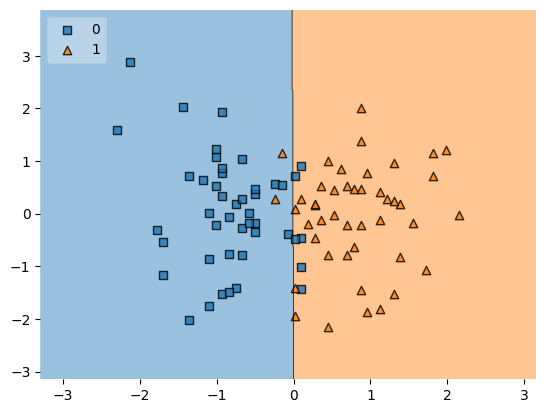

In [50]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [51]:
import pickle

In [52]:
pickle.dump(clf,open('model.pkl','wb'))